# Importing the Abalone Dataset

In [57]:
import pandas as pd

In [3]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [4]:
abalone = pd.read_csv(url, header=None)

In [5]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings",]

In [7]:
abalone = abalone.drop("Sex", axis=1)

# Descriptive Statistics From the Abalone Dataset

In [8]:
import matplotlib.pyplot as plt

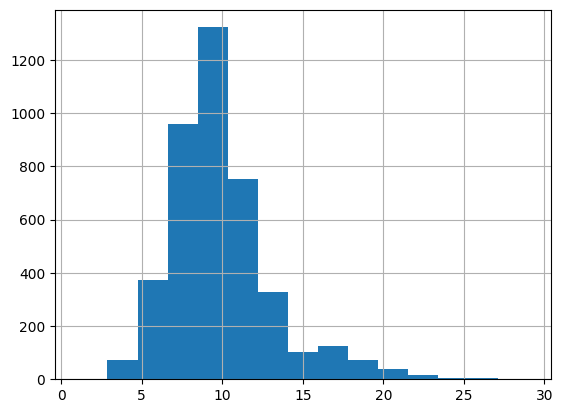

In [9]:
abalone["Rings"].hist(bins=15)
plt.show()

In [10]:
correlation_matrix = abalone.corr()

In [11]:
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# A Step-by-Step kNN

In [12]:
import numpy as np

In [13]:
a = np.array([2, 2])

In [14]:
b = np.array([4, 4])

In [15]:
np.linalg.norm(a - b)

2.8284271247461903

# k Nearest Neighbors#  

In [16]:
X = abalone.drop("Rings", axis=1)

In [17]:
X = X.values

In [18]:
y = abalone["Rings"]

In [19]:
y = y.values

In [20]:
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,])

In [21]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [22]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

# Voting or Averaging of Multiple Neighbors

In [23]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

# Average for Regression

In [24]:
prediction = nearest_neighbor_rings.mean()

# Mode for Classification

In [25]:
import scipy.stats

In [26]:
class_neighbors = np.array(["A", "B", "B", "C"])

In [27]:
scipy.stats.mode(class_neighbors)

C:\Users\Mona Shah\AppData\Local\Temp\ipykernel_14716\494549111.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(class_neighbors)
C:\Users\Mona Shah\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Mona Shah\AppData\Local\Temp\ipykernel_14716\494549111.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be us

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

# kNN in Python Using scikit-learn

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# kNN Regression in scikit-learn to the Abalone Dataset

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [32]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Using scikit-learn to Inspect Model Fit

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
from math import sqrt

In [35]:
train_preds = knn_model.predict(X_train)

In [36]:
mse = mean_squared_error(y_train, train_preds)

In [37]:
rmse = sqrt(mse)
rmse

1.6538366794859511

In [38]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

# Plotting

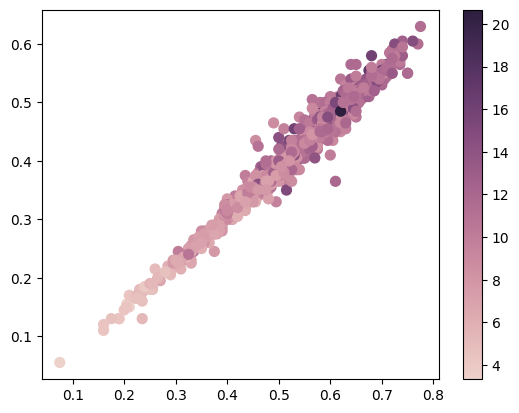

In [39]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

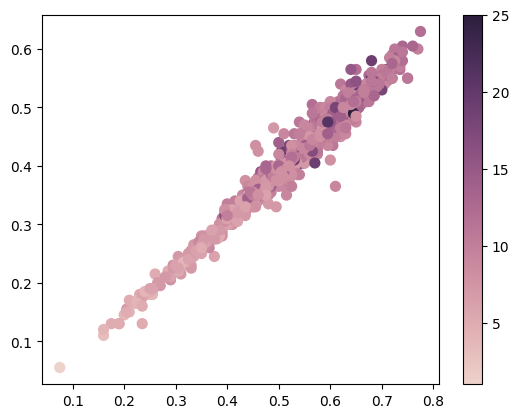

In [40]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

# Improving kNN Performances in scikit-learn Using GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [44]:
gridsearch.best_params_

{'n_neighbors': 25}

In [45]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.0731180327543384

In [46]:
test_rmse

2.1700197339962175

# Adding Weighted Average of Neighbors Based on Distance

In [47]:
parameters = {"n_neighbors": range(1, 50),
"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [48]:
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [49]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

# Improving on kNN in scikit-learn With Bagging

In [51]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [54]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [56]:
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

# Conclusion

# With the Above analysis we can say that using KNN model with bagging optimizes the performance to the maximum

# Also with the above python libraries we can get the best nearest neighbour analysis with minimum code 